In [7]:
import pandas as pd
from pybaseball import pitching_stats
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
stat23 = pitching_stats(2023)

#stat23 = stat23[['Name','FIP']]

In [80]:
def reformat_name(name):
    parts = name.split()
    first, last = parts
    return f"{last}, {first}"

stat23['Name'] = stat23['Name'].apply(reformat_name)

stat23 = stat23.rename(columns={
    'Name': 'player_name'
})

In [144]:
scores = pd.read_csv("pitch_scores.csv")

In [145]:
joined_data = stat23.merge(scores,how='left',on='player_name')
joined_data.dropna()

,IDfg,Season,player_name,Team,Age,W,L,WAR,ERA,G,...,Pit+ FO,overall,fastball,sinker,cutter,slider,sweeper,curveball,changeup,splitter


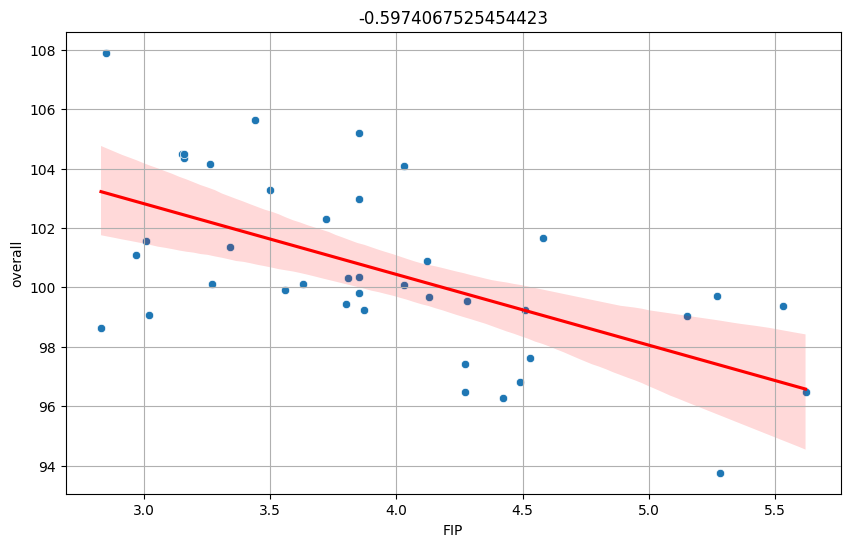

In [146]:
def filter_pitch(df, pitch):
    return df[df[pitch]>0]

stat = 'FIP'
pitch = 'overall'

filtered_data = filter_pitch(joined_data, pitch)

correlation = filtered_data[stat].corr(filtered_data[pitch])
correlation

plt.figure(figsize=(10, 6))
sns.scatterplot(x=stat, y=pitch, data=filtered_data)
sns.regplot(x=stat, y=pitch, data=filtered_data, scatter=False, color='red')
plt.title(correlation)
plt.grid(True)
plt.show()